In [1]:
from __future__ import print_function, division

from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
# from torch.optim import lr_scheduler
from torch.optim import Adam
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from load_dataset import BangladeshDataset
from utils import torch_to_im_show
import matplotlib.pyplot as plt
import time
import os
import gdal

gdal.SetCacheMax(2**30) # 1 GB

plt.ion()   # interactive mode
%matplotlib inline

In [2]:
#train_data_dir = '/mnt/staff-bucket/'
#val_data_dir = '/mnt/staff-bucket/'

train_data_dir = '/home/echartock03/tiffs'
val_data_dir = '/home/echartock03/tiffs'

train_bangladesh_csv_path = '/home/echartock03/predicting-poverty/data/bangladesh_2015_train.csv'
val_bangladesh_csv_path = '/home/echartock03/predicting-poverty/data/bangladesh_2015_valid.csv'


train_dataset = BangladeshDataset(csv_file=train_bangladesh_csv_path,
                                           root_dir=train_data_dir)
val_dataset = BangladeshDataset(csv_file=val_bangladesh_csv_path,
                                           root_dir=val_data_dir)

image_datasets = {'train': train_dataset, 'val': val_dataset}

0 (500, 500, 3) 398.204556297
1 (500, 500, 3) 188.457960204
2 (500, 500, 3) 245.299987867
3 (500, 500, 3) 150.348834992


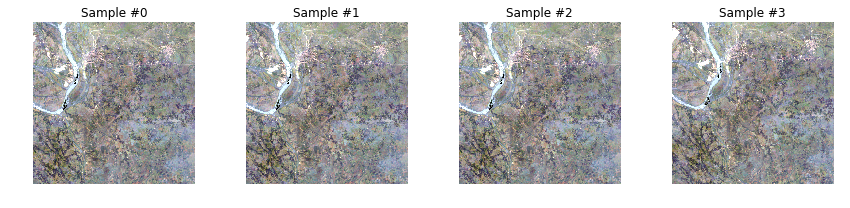

In [3]:
# visualize a few images from training set
fig = plt.figure(figsize=(12, 3))

for i in range(len(image_datasets['val'])):
    image, label = image_datasets['val'][i]
    image = np.array(image)

    print(i, image.shape, label)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    
    # expects images with shape image.shape = (500, 500, 3)
    plt.imshow(image)
    plt.pause(0.001)  # pause a bit so that plots are updated

    if i == 3:
        plt.show()
        break

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_data_dir = '/home/echartock03/tiffs'
val_data_dir = '/home/echartock03/tiffs'

train_bangladesh_csv_path = '/home/echartock03/predicting-poverty/data/bangladesh_2015_train.csv'
val_bangladesh_csv_path = '/home/echartock03/predicting-poverty/data/bangladesh_2015_valid.csv'


train_dataset = BangladeshDataset(csv_file=train_bangladesh_csv_path,
                                           root_dir=train_data_dir,
                                           transform=data_transforms['train'])
val_dataset = BangladeshDataset(csv_file=val_bangladesh_csv_path,
                                           root_dir=val_data_dir,
                                           transform=data_transforms['val'])

image_datasets = {'train': train_dataset, 'val': val_dataset}

dataloders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=False, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
model_conv = torchvision.models.resnet18(pretrained=False)

In [6]:
model_conv.load_state_dict(torch.load("./epochs_50_Tue_Oct_31_19-12-03_2017_finetune_True.model"))

In [14]:
# visualize a few images from training set
fig = plt.figure(figsize=(12, 3))

images, labels = next(iter(dataloders['val']))
inputs = Variable(images)
outputs = model_conv(inputs)
preds = outputs.data[:, 0]

print(labels)
print(preds)


 398.2046
 188.4580
 245.3000
 150.3488
[torch.DoubleTensor of size 4]


 75.5182
 75.5182
 75.5182
 84.1815
[torch.FloatTensor of size 4]

